## Import Libraries 



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Load Data

In [2]:
df = pd.read_csv("./code/data/Cars.csv")
type(df)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

##  Exploratory Data Analysis (EDA)

In [4]:
#Mapping the owner with unique numeric value

Mapping_Owner= {
    "First Owner": 1,
    "Second Owner": 2,
    "Third Owner": 3,
    "Fourth & Above Owner": 4,
    "Test Drive Car": 5
}

df['owner'] = df['owner'].map(Mapping_Owner)

In [5]:
df['owner'].unique()

array([1, 2, 3, 4, 5])

In [6]:
df['fuel'].unique()
df['seller_type'].unique()


array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [7]:
# LPG and CNG id removef from fuel 
df = df[(df['fuel'] != 'CNG') & (df['fuel'] != 'LPG')]
df['fuel'].head()
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [8]:

# kmpl is removed from mileage and mileage data is converted to float
df['mileage'] = df['mileage'].str.split().str[0].astype(float)
df['mileage'].head()

0    23.40
1    21.14
2    17.70
3    23.00
4    16.10
Name: mileage, dtype: float64

In [9]:

# CC  is removed from engine and engine data is converted to float

df['engine'] = df['engine'].str.replace('CC', '').astype(float)
df['engine'].head()



0    1248.0
1    1498.0
2    1497.0
3    1396.0
4    1298.0
Name: engine, dtype: float64

In [10]:
#bhp is removed from max_power and max_power data is converted to float



df['max_power'] = df['max_power'].str.replace('bhp', '').str.extract('(\d+\.?\d*)').astype(float)

df['max_power'].head()



<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/var/folders/s1/nd91bl292j34yqm3cwjkp5kh0000gn/T/ipykernel_1475/3904069798.py:5: SyntaxWarning: invalid escape sequence '\d'
  df['max_power'] = df['max_power'].str.replace('bhp', '').str.extract('(\d+\.?\d*)').astype(float)


0     74.00
1    103.52
2     78.00
3     90.00
4     88.20
Name: max_power, dtype: float64

In [11]:
#only first name of car brand name is kept and others are removed

df['name'] = df['name'].str.split().str[0]
df['name'].head()

0     Maruti
1      Skoda
2      Honda
3    Hyundai
4     Maruti
Name: name, dtype: object

In [12]:
df= df.drop(columns=['torque'])

In [13]:
# Test Drive Cars are expensive so are drop from the data 

df= df[df['owner'] != 5]
df['owner'].unique()


array([1, 2, 3, 4])

In [14]:
df['km_driven']= df['km_driven'] = df['km_driven'].astype(float)
df['km_driven'].head()

0    145500.0
1    120000.0
2    140000.0
3    127000.0
4    120000.0
Name: km_driven, dtype: float64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   float64
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 815.3+ KB


<Axes: xlabel='km_driven', ylabel='selling_price'>

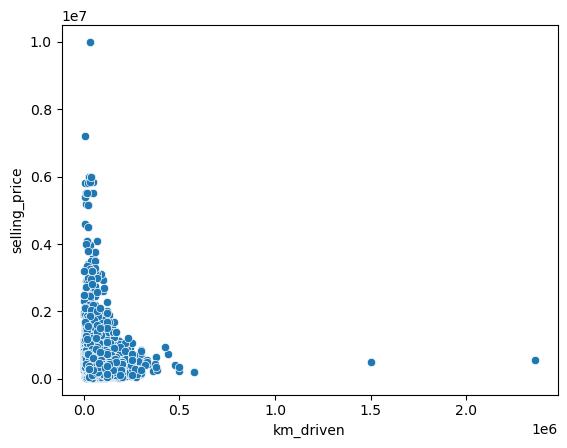

In [16]:
#scatter plot for engine vs selling price

sns.scatterplot(x= df['km_driven'], y = df['selling_price'])

<Axes: xlabel='mileage', ylabel='selling_price'>

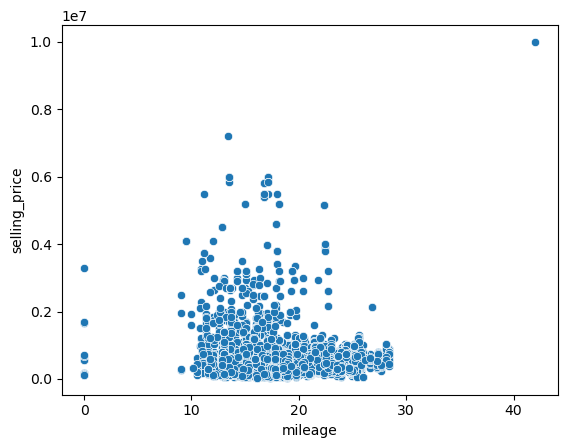

In [17]:
#scatter plot for mileage vs selling price

sns.scatterplot(x =df['mileage'], y=df['selling_price'])


<Axes: xlabel='engine', ylabel='max_power'>

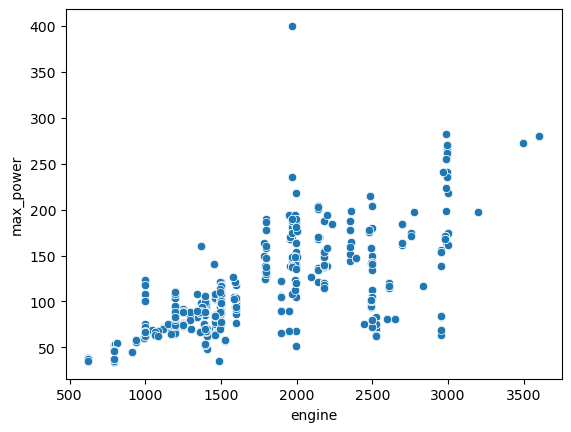

In [18]:
#scatter plot for engine vs max_power
sns.scatterplot(x =df['engine'], y=df['max_power'])

<Axes: xlabel='engine', ylabel='mileage'>

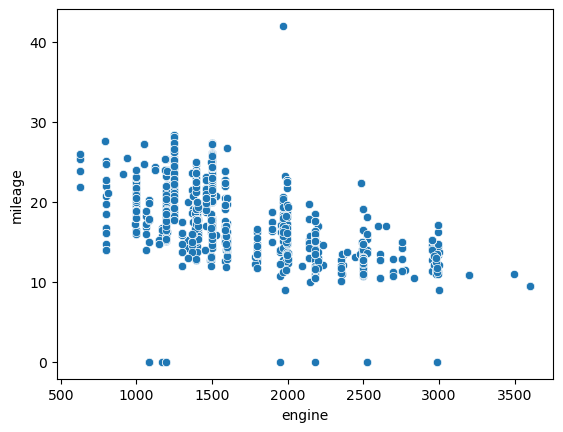

In [19]:
# scatter plot for engine vs mileage
sns.scatterplot(x=df['engine'], y=df['mileage'])


### Label Encoder 

In [20]:
#label Encoder for fuel

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df["fuel"] = le.fit_transform(df["fuel"])
df["fuel"].unique()

array([0, 1])

In [21]:
#label Encoder for transmission 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["transmission"] = le.fit_transform(df["transmission"])
df["transmission"].unique()



array([1, 0])

### One hot encoding

In [22]:

df_encoded = pd.get_dummies(df, columns=['seller_type'], prefix='seller_type')
print(df_encoded)


         name  year  selling_price  km_driven  fuel  transmission  owner  \
0      Maruti  2014         450000   145500.0     0             1      1   
1       Skoda  2014         370000   120000.0     0             1      2   
2       Honda  2006         158000   140000.0     1             1      3   
3     Hyundai  2010         225000   127000.0     0             1      1   
4      Maruti  2007         130000   120000.0     1             1      1   
...       ...   ...            ...        ...   ...           ...    ...   
8123  Hyundai  2013         320000   110000.0     1             1      1   
8124  Hyundai  2007         135000   119000.0     0             1      4   
8125   Maruti  2009         382000   120000.0     0             1      1   
8126     Tata  2013         290000    25000.0     0             1      1   
8127     Tata  2013         290000    25000.0     0             1      1   

      mileage  engine  max_power  seats  seller_type_Dealer  \
0       23.40  1248.0   

#### Correlation Matrix

/var/folders/s1/nd91bl292j34yqm3cwjkp5kh0000gn/T/ipykernel_1475/1962750760.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_encoded.corr(), annot= True, cmap= 'coolwarm')


<Axes: >

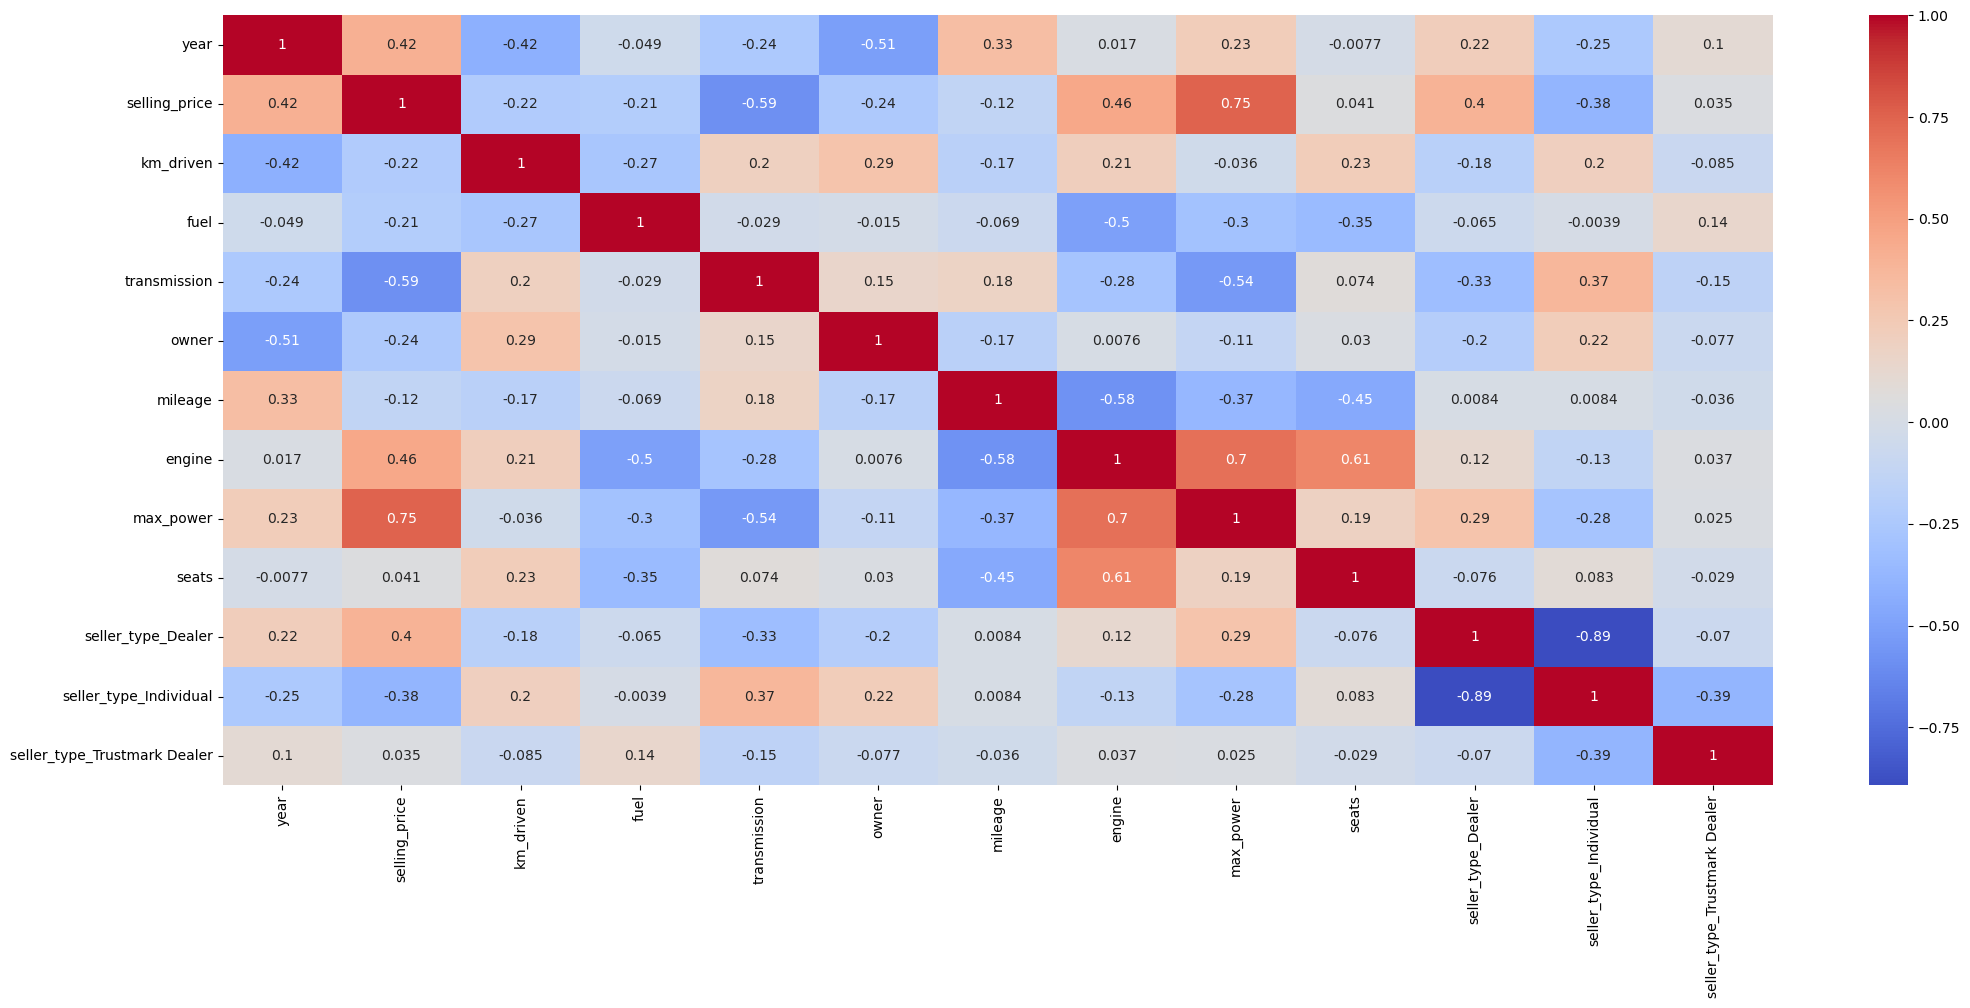

In [23]:
plt.figure(figsize= (25, 10))
sns.heatmap(df_encoded.corr(), annot= True, cmap= 'coolwarm')


### Predictive Power Score

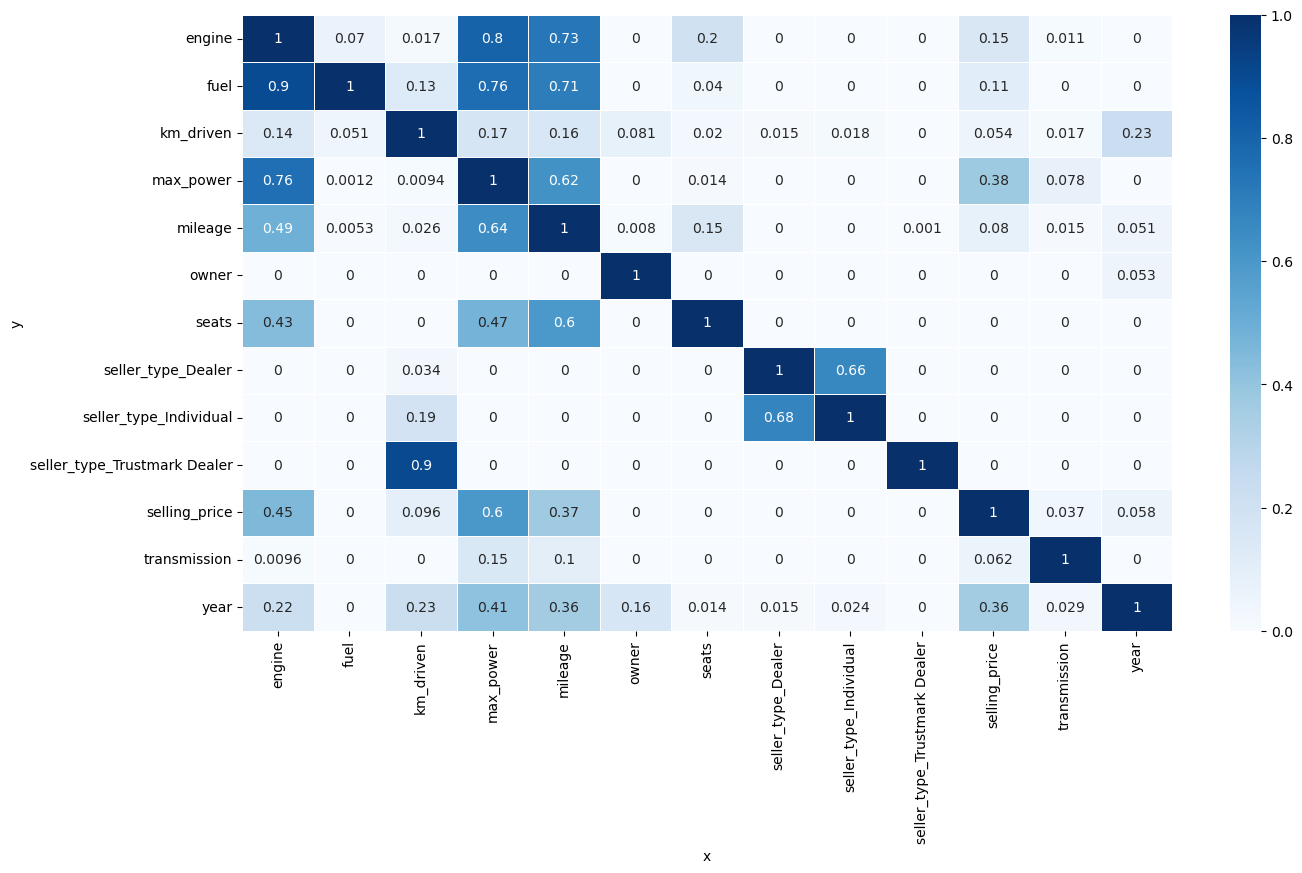

In [24]:
import ppscore as pps

df_copy =df_encoded.copy()
df_copy.drop(['name'], axis= 'columns', inplace= True)

matrix_df = pps.matrix(df_copy)[['x','y', 'ppscore']].pivot(columns='x',index='y', values= 'ppscore')
plt.figure(figsize=(15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap='Blues', linewidths=0.5, annot=True)
plt.show()



### Binning

In [25]:
# need to cut
df_encoded['selling_price'] = pd.cut(df_encoded['selling_price'], bins = 4, labels = [0, 1, 2, 3], include_lowest = True)

## Feature Selection

In [26]:
X= df_encoded[['engine','mileage','km_driven','year']]
assert len(X.shape) ==2

In [27]:
y= df_encoded['selling_price']
assert len(y.shape)  == 1

In [28]:
k = len(set(y))
k

4

### Train test split

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=12)


## Preprocessing

In [30]:
X_train.isna().sum()

engine       151
mileage      151
km_driven      0
year           0
dtype: int64

In [31]:
X_test.isna().sum()

engine       63
mileage      63
km_driven     0
year          0
dtype: int64

<Axes: >

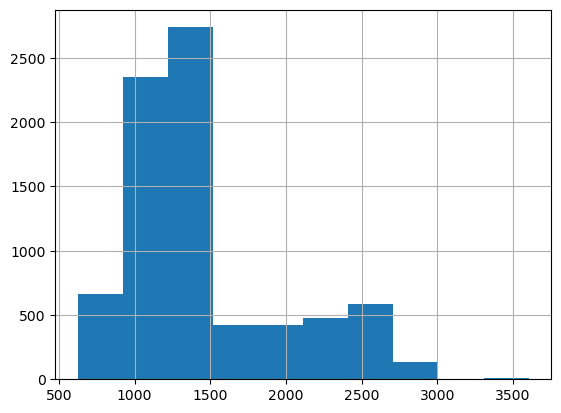

In [32]:
#histogram for enigine which methods can be used to calculate the missing values

df_encoded.engine.hist()

<Axes: >

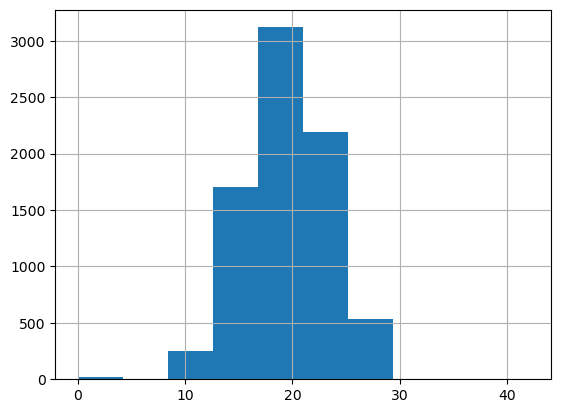

In [33]:
#histogram for mileage which methods can be used to calculate the 
df_encoded.mileage.hist()

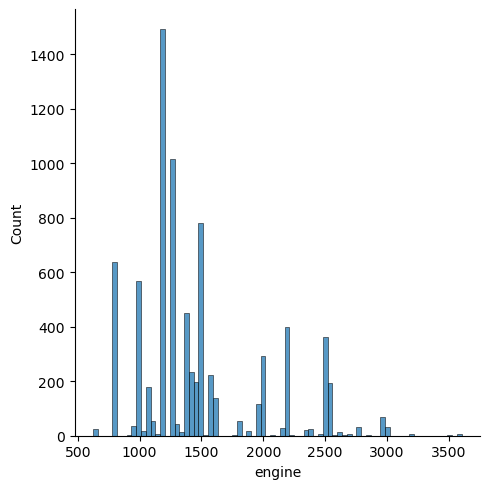

In [34]:
sns.displot(data=df, x ='engine')

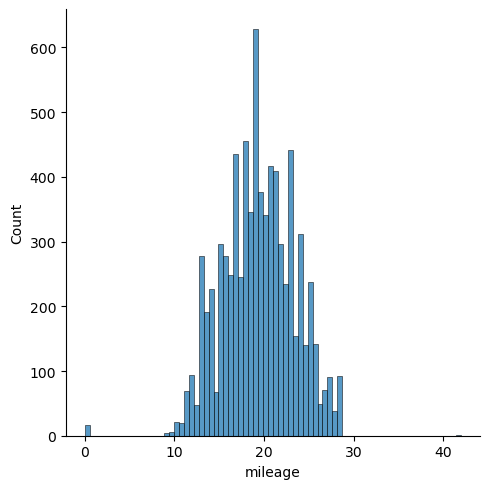

In [35]:
sns.displot(data=df, x='mileage')

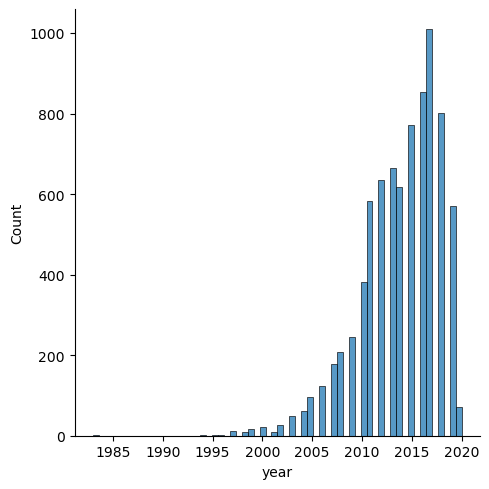

In [36]:
sns.displot(data=df, x='year')

In [37]:
# Calculating the median values for x_train and x_test

X_train['engine'].fillna(X_train.engine.median(), inplace=True)
X_test['engine'].fillna(X_train.engine.median(), inplace=True)

In [38]:
# Calculating the median values for x_train and x_test
X_train['mileage'].fillna(X_train.mileage.mean(), inplace=True)
X_test['mileage'].fillna(X_train.mileage.mean(), inplace=True)

In [39]:
X_train.isna().sum()

engine       0
mileage      0
km_driven    0
year         0
dtype: int64

In [40]:
X_test.isna().sum()

engine       0
mileage      0
km_driven    0
year         0
dtype: int64

In [41]:
# X_train= X_train.to_numpy()
# X_test = X_test.to_numpy()

# y_train = y_train.to_numpy()
# y_test = y_test.to_numpy()

## Scaling

In [42]:
from sklearn.preprocessing import MinMaxScaler



num_col = ['year', 'mileage', 'engine', 'km_driven']

# Create a MinMaxScaler to scale features to a specified range (0 to 1)
scaler = MinMaxScaler(feature_range=(0, 1))

X_train[num_col] = scaler.fit_transform(X_train[num_col])


X_test[num_col] = scaler.transform(X_test[num_col])



In [43]:
#Encoding of Y_train
Y_train_encoded = pd.get_dummies(y_train)

In [44]:
X_train = X_train.to_numpy()
X_test  = X_test.to_numpy()
Y_train_encoded = Y_train_encoded.to_numpy()
y_test  = y_test.to_numpy()

In [45]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5378, 4)
Shape of y_train:  (5378,)
Shape of X_test:  (2650, 4)
Shape of y_test:  (2650,)


In [46]:
import mlflow
import os
import time

mlflow_url = 'https://mlflow.ml.brain.cs.ait.ac.th/'
mlflow.set_tracking_uri(mlflow_url)

os.environ["MLFLOW_TRACKING_USERNAME"] = "admin"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "password"


os.environ["LOGNAME"] = "st125024-Ishika-Pradhan"

mlflow.set_experiment(experiment_name="st125024-a3")



<Experiment: artifact_location='mlflow-artifacts:/806086644348461553', creation_time=1727797388800, experiment_id='806086644348461553', last_update_time=1727797388800, lifecycle_stage='active', name='st125024-a3', tags={}>

## Logistic Regression Model with Advanced Features

In [47]:
class LogisticRegression:
    
    def __init__(self, regularization, k, n, method, alpha = 0.001, max_iter=5000):
        self.regularization = regularization
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
        self.W = None
        self.losses = []
    
    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k)
        params = {
            "reg" : type(self).__name__,
            "method" : self.method,
            "k" : int(self.k),
            "n" : int(self.n),
            "alpha" : self.alpha,
            "max_iter" : self.max_iter

            
        }
        mlflow.log_params(params=params)
        
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #with replacement
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")
            
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
        
        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m
        error = h - Y

        if self.regularization:
            grad = self.softmax_grad(X, error) + self.regularization.derivation(self.W)
        else:
            grad = self.softmax_grad(X, error)

        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

    def accuracy(self, y_test, y_pred):
        correct_predicitions = np.sum(y_test == y_pred)
        total_predicitions = y_test.shape[0]
        return correct_predicitions / total_predicitions
    
    def precision(self, y_test, y_pred,c=0):
        tp = np.sum((y_test == c) & (y_pred == c))
        fp = np.sum((y_test != c) & (y_pred == c))
        if tp + fp == 0:
            return 0
        else:
            return tp / (tp + fp)
        
    def recall(self, y_test, y_pred, c=0):
            tp = np.sum((y_test == c) & (y_pred == c))
            fn = np.sum((y_test == c) & (y_pred != c))
            if tp + fn == 0:
                return 0
            else:
                return tp / (tp + fn)
            

    def f1_score(self, y_test, y_pred, c=0):
        precision = self.precision(y_test, y_pred, c)
        recall = self.recall(y_test, y_pred, c)
        if precision + recall == 0:
            return 0
        else:
            return 2 * (precision * recall) / (precision + recall)
        
    def macro_precision(self, y_test, y_pred):
        precisions= [self.precision(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(precisions) / self.k
    
    def macro_recall(self, y_test, y_pred):
        recalls= [self.recall(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(recalls) / self.k 
    
    def macro_f1(self, y_test, y_pred):
        f1s= [self.f1_score(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(f1s) / self.k
    
    def weighted_precision(self, y_test, y_pred):
       class_counts=[np.count_nonzero(y_test==c) for c in range(self.k)]
       precisions= [class_counts[c] / len(y_test) * self.precision(y_test, y_pred, c) for c in range(self.k)]
       return np.sum(precisions)
    
    def weighted_recall(self, y_test, y_pred):
         class_counts=[np.count_nonzero(y_test==c) for c in range(self.k)]
         recalls= [class_counts[c] / len(y_test) * self.recall(y_test, y_pred, c) for c in range(self.k)]
         return np.sum(recalls)
    
    def weighted_f1(self, y_test, y_pred):
            class_counts=[np.count_nonzero(y_test==c) for c in range(self.k)]
            f1s= [class_counts[c] / len(y_test) * self.f1_score(y_test, y_pred, c) for c in range(self.k)]
            return np.sum(f1s)
    
    def classification_report (self, y_test, y_pred):
        cols = ["precision", "recall", "f1_score"]
        idx = list(range(self.k)) + ["accuracy", "macro", "weighted"]

        report = [[self.precision(y_test, y_pred, c), 
                   self.recall(y_test, y_pred, c), 
                   self.f1_score(y_test, y_pred, c)] for c in range(self.k)]
        
        report.append(["","",self.accuracy(y_test, y_pred)])
        report.append([self.macro_precision(y_test, y_pred), 
                       self.macro_recall(y_test, y_pred), 
                       self.macro_f1(y_test, y_pred)])
        
        report.append([self.weighted_precision(y_test, y_pred), 
                       self.weighted_recall(y_test, y_pred), 
                       self.weighted_f1(y_test, y_pred)])
        
        return pd.DataFrame(report, columns=cols, index=idx)



### RidgePenalty Calculation

In [48]:
class RidgePenalty:
    
  def __init__(self, l):
    self.l = l

  def __call__(self, theta):
        return  self.l * np.sum(np.square(theta))
    
  def derivation(self, theta):
        return 2 * self.l * theta
    
class Ridge(LogisticRegression):
   def __init__(self, l, k, n, method, alpha = 0.001, max_iter=5000):
        regularization = RidgePenalty(l)
        super().__init__(regularization, k, n, method, alpha, max_iter)


      

### Normal Calculation Without penalty

In [49]:
class Normal(LogisticRegression):

    def __init__(self, k, n, method, alpha=0.001, max_iter=5000):
        super().__init__(regularization=None, k=k, n=n, method=method, alpha=alpha, max_iter=max_iter)

In [50]:

#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

## Experiment

In [51]:
# Grid search with regularization method (normal and), methods, and alpha values

regs = ["Normal", "Ridge"]
methods = ["batch", "minibatch", "sto"]
alphas = [0.01, 0.001, 0.0001]
best_model = None
best_train_loss = float('inf')
best_reg_name = ""
best_method = ""

for reg in regs:
    for method in methods:
        mlflow.start_run(run_name=f"reg-{reg}-method-{method}", nested=True)

        for alpha in alphas:
            if reg == "Normal":
                params = {"k": k, "n":X_train.shape[1], "method": method, "alpha": alpha, "max_iter": 10000}
            else:
                params = {"k": k, "n":X_train.shape[1], "method": method, "l": 0.1, "alpha": alpha, "max_iter": 10000}
            
            with mlflow.start_run(run_name=f"reg-{reg}-method-{params['method']}-alpha-{params['alpha']}", nested=True):
                print("="*30)
                print(reg, method)
                print(f"alpha: {alpha}")
                print("="*30)
                type_of_regression = str_to_class(reg)    #Normal, Ridge
                model = type_of_regression(**params)  
                model.fit(X_train, Y_train_encoded)
                yhat = model.predict(X_test)

                accuracy = model.accuracy(y_test, yhat)
                mlflow.log_metric(key="accuracy", value=accuracy)

                for c in range(k):
                    f1 = model.f1_score(y_test, yhat, c)
                    precision = model.precision(y_test, yhat, c)
                    recall = model.recall(y_test, yhat, c)
                    mlflow.log_metric(key=f"class_{c}_f1", value=f1)
                    mlflow.log_metric(key=f"class_{c}_recall", value=recall)
                    mlflow.log_metric(key=f"class_{c}_precision", value=precision)
                
                # Get the final training loss
                final_train_loss = model.losses[-1]
                print(f"Final Training Loss: {final_train_loss}")
                
                # Compare the current model's training loss with the best so far
                if final_train_loss < best_train_loss:
                    best_train_loss = final_train_loss
                    best_model = model
                    best_reg_name = reg
                    best_method = method

                signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)                

        mlflow.end_run()

mlflow.end_run()

Normal batch
alpha: 0.01
Loss at iteration 0 1.2828305717356852
Loss at iteration 500 0.15236173239835343
Loss at iteration 1000 0.1312631665566744
Loss at iteration 1500 0.13961125932503124
Loss at iteration 2000 0.12812521485318226
Loss at iteration 2500 0.12418151243426123
Loss at iteration 3000 0.12024611567656522
Loss at iteration 3500 0.11973651729701953
Loss at iteration 4000 0.11984691319456862
Loss at iteration 4500 0.12085574052016358
Loss at iteration 5000 0.12205969471819836
Loss at iteration 5500 0.12112352749710259
Loss at iteration 6000 0.12029660237651087
Loss at iteration 6500 0.1195605577447065
Loss at iteration 7000 0.11889819539294261
Loss at iteration 7500 0.11829678874478598
Loss at iteration 8000 0.11774673094450497
Loss at iteration 8500 0.11724063276554576
Loss at iteration 9000 0.11677270761620805
Loss at iteration 9500 0.11633834455039244
time taken: 8.316652059555054
Final Training Loss: 0.12880658267457404
Normal batch
alpha: 0.001
Loss at iteration 0 1.340

## Finding the best model

**********
Best Model:
Regularization: Normal
Method: sto
Final Training Loss: 0.05006871314759899
**********


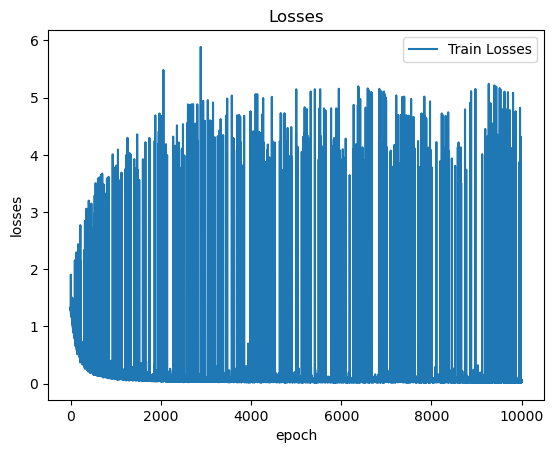

In [52]:
# Plotting the loss graph the graph of the best model
print("*" * 10)
print("Best Model:")
print(f"Regularization: {best_reg_name}")
print(f"Method: {best_method}")
print(f"Final Training Loss: {best_train_loss}")
print("*" * 10)
best_model.plot()
plt.show()


## Comparing its confusion matrix with custom and sklearn

In [53]:
from sklearn.metrics import classification_report as sklearn_classification_report

# Assuming best_model is already defined based on the previous code

# Use the best model to predict
yhat = best_model.predict(X_test)

# Custom classification report
custom_classification_report = best_model.classification_report(y_test, yhat)
print("*" * 5, "Custom Classification report", "*" * 5)
print(custom_classification_report)

# Sklearn's classification report
sklearn_report = sklearn_classification_report(y_test, yhat)
print("\n")
print("*" * 5, "Sklearn's Classification report", "*" * 5)
print(sklearn_report)

***** Custom Classification report *****
         precision    recall  f1_score
0         0.964151       1.0  0.981748
1                0       0.0  0.000000
2                0       0.0  0.000000
3                0         0  0.000000
accuracy                      0.964151
macro     0.241038      0.25  0.245437
weighted  0.929587  0.964151  0.946554


***** Sklearn's Classification report *****
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2555
           1       0.00      0.00      0.00        56
           2       0.00      0.00      0.00        39

    accuracy                           0.96      2650
   macro avg       0.32      0.33      0.33      2650
weighted avg       0.93      0.96      0.95      2650



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Testing

In [54]:
import pickle

filename = 'a3_car_prediction.model' 
pickle.dump(best_model, open(f'./code/{filename}', 'wb'))
# loading the model from disk
loaded_model = pickle.load(open(f'./code/{filename}', 'rb'))


In [57]:
import mlflow
model_name = "st125024-a3-model"
model_version = 1
model = mlflow.pyfunc.load_model(model_uri=f"models:/{model_name}/{model_version}")


In [59]:
# predict X_test based on the loaded model

predict_selling_price= model.predict(pd.DataFrame(X_test))
predict_selling_price[:20]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [62]:
# The actual values of y
y_test[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])